In [105]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [106]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [107]:
from sklearn import preprocessing
data = pd.read_csv('/content/Churn_train.csv')
data.dropna(inplace=True)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


In [108]:
data_op_ori = pd.read_csv('/content/Churn_test.csv')
data_ori = pd.read_csv('/content/Churn_train.csv')

In [109]:
data_op = pd.read_csv('/content/Churn_test.csv')


In [148]:
data.groupby(["tenure"]).min()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
tenure,,,,,,,,,,,,,,,,,,,
0,Female,0,No,Yes,No,No,DSL,No internet service,No,No,No,No,No,One year,No,Bank transfer (automatic),19.70000,,No
1,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),18.80000,100.25,No
2,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),18.75000,101.65,No
3,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),18.80000,101.1,No
4,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),18.85000,101.9,No
5,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),19.25000,100.2,No
6,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),18.95000,100.35,No
7,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),18.95000,112.3,No
8,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),19.35000,130.25,No


In [111]:

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.00000,5634.00000,5634.00000
mean,0.16187,32.27796,64.77913
std,0.36837,24.55521,30.10499
min,0.00000,0.00000,18.25000
25%,0.00000,9.00000,35.40000
50%,0.00000,29.00000,70.37500
75%,0.00000,55.00000,89.85000
max,1.00000,72.00000,118.65000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 0 to 5633
Data columns (total 21 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null object
OnlineBackup        5634 non-null object
DeviceProtection    5634 non-null object
TechSupport         5634 non-null object
StreamingTV         5634 non-null object
StreamingMovies     5634 non-null object
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5634 non-null object
Churn               5634 non-null object
dtypes: float64(1), int64(2), obj

In [113]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
  
    print(); print(to_drop)


[]


In [114]:


data.drop(data[to_drop], axis=1,inplace = True)
data.drop('customerID', axis = 1,inplace=True)

data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('customerID', axis = 1,inplace=True)


In [115]:
#data['month'] = data['month'].astype("str")
#data['day'] = data['day'].astype("str")
#data['hour'] = data['hour'].astype("str")

#data_op['month'] = data_op['month'].astype("str")
#data_op['day'] = data_op['day'].astype("str")
#data_op['hour'] = data_op['hour'].astype("str")
#data.info()

In [116]:

#data['MDH'] = data['month'] + data['day']+data['hour']
#data.drop('month', axis = 1,inplace=True)
#data.drop('day', axis = 1,inplace=True)
#data.drop('hour', axis = 1,inplace=True)
#data.head(10)

In [117]:

#data_op['MDH'] = data_op['month'] + data_op['day']+data_op['hour']
#data_op.drop('month', axis = 1,inplace=True)
#data_op.drop('day', axis = 1,inplace=True)
#data_op.drop('hour', axis = 1,inplace=True)
#data_op.head(10)

In [118]:
y=data["Churn"]
y.head()

0     No
1    Yes
2     No
3     No
4     No
Name: Churn, dtype: object

In [119]:
x=pd.DataFrame(data)
x.drop("Churn",axis =1,inplace=True)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35
1,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55
2,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75
3,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85
4,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75


In [120]:
strcolumns = x.columns
strcolumns.drop(['SeniorCitizen','MonthlyCharges','tenure'])
strcolumns


label_encoder = preprocessing.LabelEncoder()
for each in strcolumns :
    x[each] = label_encoder.fit_transform(x[each])


label_encoder = preprocessing.LabelEncoder()
for each in strcolumns :
    data_op[each] = label_encoder.fit_transform(data_op[each])

In [141]:
data.groupby(["gender"]).count()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,,,,,
Female,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796
Male,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838


In [121]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


In [122]:
data_op.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,41,1,0,0,2,0,2,2,2,2,1,1,0,454,622
1,0,1,0,0,66,1,2,1,2,0,0,0,2,2,2,1,0,710,1082
2,0,0,0,0,12,1,0,0,0,0,0,0,0,0,0,1,0,150,921
3,0,0,0,0,5,1,2,0,0,0,0,0,0,0,0,1,3,195,480
4,0,0,1,1,10,1,0,0,0,2,2,0,0,2,1,1,3,313,1097


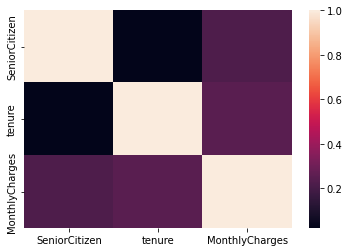

In [123]:
sns.heatmap(data.corr())

In [124]:
#sns.pairplot(data)

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 3)


In [126]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4507, 19)
(4507,)
(1127, 19)
(1127,)


In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()

#param_grid = {'penalty': ['l1','l2', 'elasticnet', 'none'],
 #                'class_weight': ['dict','balanced'],
  #             'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}

#lr = RandomizedSearchCV(cv, param_grid, cv= 5)


lr.fit(x_train,y_train)




LogisticRegression()

In [129]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [130]:
y_test_pred_op = lr.predict(x_test)


In [131]:
#y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,No
1,No


In [132]:

op = pd.DataFrame(data_op_ori["customerID"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('customerID')   

#op[op.columns[1]] = op[op.columns[1]].astype("Int64")

op.columns =['customerID', 'OP']

op.head(2)


,customerID,OP
0,8879-ZKJOF,No
1,0201-MIBOL,No


In [133]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [134]:
op.groupby("OP").count()

,customerID
OP,
No,1321
Yes,88


In [135]:
data.groupby("Churn").count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
No,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113
Yes,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521


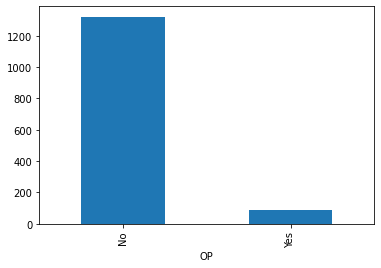

In [136]:
(op.groupby(['OP'])['OP'].count()).plot(kind='bar')

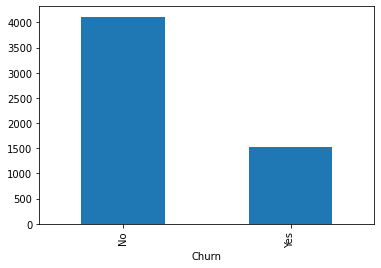

In [137]:
(data.groupby(['Churn'])['Churn'].count()).plot(kind='bar')

In [138]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [139]:
x_test.shape

(1409, 19)

In [140]:
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix


confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_matrix.index = ['Positive','Negative']
confusion_matrix.columns = ['Positive','Negative']
print(confusion_matrix)

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report                   # To generate classification report


train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)